In [1]:
from LRGradientDescent import LogisticRegressionGradientDescent as LRGD
from LRGradientDescentWithFeatureTransform import LRGDWithFeatureTransform as LRGDF
from show_images import show_images
import numpy as np
from scipy.special import logsumexp
from scipy.special import expit as sigm #sigmoid function
from numpy import genfromtxt
from matplotlib import pyplot as plt

import os
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

import sklearn.linear_model
import sklearn.tree
import sklearn.metrics

from scipy.special import expit as sigm
from numpy.random import randint

In [2]:
x= genfromtxt('data_sneaker_vs_sandal/x_train.csv', delimiter=',')[1:]
#xbias_NG = lr.insert_final_col_of_all_ones(x_all)
y= genfromtxt('data_sneaker_vs_sandal/y_train.csv', delimiter=',')[1:]

In [3]:
print(x.shape, y.shape)

(12000, 784) (12000,)


In [4]:
def calc_TP_TN_FP_FN(ytrue_N, yhat_N):
    ''' Compute counts of four possible outcomes of a binary classifier for evaluation.
    
    Args
    ----
    ytrue_N : 1D array of floats
        Each entry represents the binary value (0 or 1) of 'true' label of one example
        One entry per example in current dataset
    yhat_N : 1D array of floats
        Each entry represents a predicted binary value (either 0 or 1).
        One entry per example in current dataset.
        Needs to be same size as ytrue_N.

    Returns
    -------
    TP : float
        Number of true positives
    TN : float
        Number of true negatives
    FP : float
        Number of false positives
    FN : float
        Number of false negatives
    '''
    TP = 0.0
    TN = 0.0
    FP = 0.0
    FN = 0.0
    FP_id=[]
    FN_id=[]
    l=ytrue_N.size
    for i in range(0,l):
        if (yhat_N[i]==1):
            if (ytrue_N[i]==1):
                TP=TP+1.0
            else:
                FP=FP+1.0
                #FP_id.append(i)
        else:
            if (ytrue_N[i]==0):
                TN=TN+1.0
            else:
                FN=FN+1.0
                #FN_id.append(i)      
    return TP, TN, FP, FN #, FP_id, FN_id

In [5]:
def make_noise(x,y):
    N=int(x[0,:].size)
    #print(N)
    x_all=x;
    y_all=y;
    x_on=0;
    for j in range(9):
        x_j=x
        for i in range(y.size):
            for k in range(randint(0,10)):
                pos=randint(0,N)
                x_j[i, pos]=1-x[i,pos]
        x_all=np.concatenate((x_all, x_j), axis=0)
        y_all=np.concatenate((y_all, y), axis=0)
        #print(x_all.shape)
    return x_all, y_all

In [6]:
x_n, y_n=make_noise(x,y)

In [7]:
print(x_n.shape, np.matrix(y_n).shape)
#all_D=np.column_stack((x_n, np.matrix(y_n)))

(120000, 784) (1, 120000)


In [8]:
# Reshuffle:
Data=np.concatenate((x_n, np.matrix(y_n).T), axis=1)
np.random.shuffle(Data)
x_n=Data[:,:-1]
y_n=np.asarray(Data[:,-1]).reshape(-1)

In [9]:
va_rate=0.3
x_va=x_n[:int(np.ceil(va_rate*y_n.shape[0])),]
y_va=y_n[:int(np.ceil(va_rate*y_n.shape[0]))]
x_te=x_n[int(np.ceil(va_rate*y_n.shape[0])):,]
y_te=y_n[int(np.ceil(va_rate*y_n.shape[0])):]

In [10]:
#Check
print (x_te.shape, y_te.shape)
print(y_n.shape)

(84000, 784) (84000,)
(120000,)


In [11]:
## Run LR on original features!
#orig_lr2 = LRGD(alpha=10.0, step_size=0.1)
#orig_lr2.fit(x_te, y_te)

In [12]:
#y_hat_Origin=np.asarray(orig_lr2.predict_proba(x_va)[:,1]).reshape(-1)
#tp, tn, fp, fn=calc_TP_TN_FP_FN(y_va, y_hat_Origin>=0.5)
#acc=(tp + tn) / float(tp + tn + fp + fn + 1e-10)
#print("Origin Accuracy", acc)

In [13]:
## Run LR on transformed features!
#new_lr2 = LRGDF(alpha=10.0, step_size=0.1)
#new_lr2.fit(x_te, y_te)

In [14]:
va_rate=0.3
x_va0=x[:int(np.ceil(va_rate*y.shape[0])),]
y_va0=y[:int(np.ceil(va_rate*y.shape[0]))]
x_te0=x[int(np.ceil(va_rate*y.shape[0])):,]
y_te0=y[int(np.ceil(va_rate*y.shape[0])):]
orig_lr1 = LRGDF(alpha=10.0, step_size=0.1)
orig_lr1.fit(x_te0, y_te0)

orig_lr0 = LRGD(alpha=10.0, step_size=0.1)
orig_lr0.fit(x_te0, y_te0)

With MinMax
TurnOn Loaded
TurnOnOnce Loaded
Ave Loaded
Initializing w_G with 1572 features using recipe: zeros
Running up to 1000000 iters of gradient descent with step_size 0.1
iter    0/1000000  loss         1.000000  avg_L1_norm_grad         0.028984  w[0]    0.000 bias    0.000
iter    1/1000000  loss         0.942317  avg_L1_norm_grad         0.056494  w[0]    0.000 bias    0.000
iter    2/1000000  loss         1.259524  avg_L1_norm_grad         0.094324  w[0]    0.002 bias    0.034
iter    3/1000000  loss         2.026858  avg_L1_norm_grad         0.112214  w[0]   -0.000 bias   -0.008
iter    4/1000000  loss         1.060370  avg_L1_norm_grad         0.083845  w[0]    0.003 bias    0.056
iter    5/1000000  loss         1.496390  avg_L1_norm_grad         0.093988  w[0]    0.001 bias    0.019
iter    6/1000000  loss         0.912403  avg_L1_norm_grad         0.071334  w[0]    0.004 bias    0.073
iter    7/1000000  loss         1.135081  avg_L1_norm_grad         0.075217  w[0]    0.

iter 2901/1000000  loss         0.174416  avg_L1_norm_grad         0.000087  w[0]    0.071 bias    0.506
iter 3000/1000000  loss         0.174214  avg_L1_norm_grad         0.000083  w[0]    0.071 bias    0.506
iter 3001/1000000  loss         0.174212  avg_L1_norm_grad         0.000083  w[0]    0.071 bias    0.505
iter 3100/1000000  loss         0.174028  avg_L1_norm_grad         0.000079  w[0]    0.072 bias    0.505
iter 3101/1000000  loss         0.174027  avg_L1_norm_grad         0.000079  w[0]    0.072 bias    0.505
iter 3200/1000000  loss         0.173859  avg_L1_norm_grad         0.000075  w[0]    0.072 bias    0.504
iter 3201/1000000  loss         0.173857  avg_L1_norm_grad         0.000075  w[0]    0.072 bias    0.504
iter 3300/1000000  loss         0.173703  avg_L1_norm_grad         0.000072  w[0]    0.073 bias    0.503
iter 3301/1000000  loss         0.173702  avg_L1_norm_grad         0.000072  w[0]    0.073 bias    0.503
iter 3400/1000000  loss         0.173561  avg_L1_norm_g

iter 6900/1000000  loss         0.171964  avg_L1_norm_grad         0.000017  w[0]    0.079 bias    0.472
iter 6901/1000000  loss         0.171963  avg_L1_norm_grad         0.000017  w[0]    0.079 bias    0.472
iter 7000/1000000  loss         0.171954  avg_L1_norm_grad         0.000016  w[0]    0.079 bias    0.472
iter 7001/1000000  loss         0.171954  avg_L1_norm_grad         0.000016  w[0]    0.079 bias    0.472
iter 7100/1000000  loss         0.171945  avg_L1_norm_grad         0.000016  w[0]    0.079 bias    0.471
iter 7101/1000000  loss         0.171945  avg_L1_norm_grad         0.000016  w[0]    0.079 bias    0.471
iter 7200/1000000  loss         0.171936  avg_L1_norm_grad         0.000015  w[0]    0.079 bias    0.470
iter 7201/1000000  loss         0.171936  avg_L1_norm_grad         0.000015  w[0]    0.079 bias    0.470
iter 7300/1000000  loss         0.171928  avg_L1_norm_grad         0.000015  w[0]    0.079 bias    0.470
iter 7301/1000000  loss         0.171928  avg_L1_norm_g

iter 10800/1000000  loss         0.171816  avg_L1_norm_grad         0.000004  w[0]    0.080 bias    0.452
iter 10801/1000000  loss         0.171816  avg_L1_norm_grad         0.000004  w[0]    0.080 bias    0.452
iter 10900/1000000  loss         0.171815  avg_L1_norm_grad         0.000004  w[0]    0.080 bias    0.452
iter 10901/1000000  loss         0.171815  avg_L1_norm_grad         0.000004  w[0]    0.080 bias    0.452
iter 11000/1000000  loss         0.171814  avg_L1_norm_grad         0.000004  w[0]    0.080 bias    0.451
iter 11001/1000000  loss         0.171814  avg_L1_norm_grad         0.000004  w[0]    0.080 bias    0.451
iter 11100/1000000  loss         0.171813  avg_L1_norm_grad         0.000004  w[0]    0.080 bias    0.451
iter 11101/1000000  loss         0.171813  avg_L1_norm_grad         0.000004  w[0]    0.080 bias    0.451
iter 11200/1000000  loss         0.171812  avg_L1_norm_grad         0.000004  w[0]    0.080 bias    0.451
iter 11201/1000000  loss         0.171812  avg

iter 14700/1000000  loss         0.171798  avg_L1_norm_grad         0.000001  w[0]    0.081 bias    0.444
iter 14701/1000000  loss         0.171798  avg_L1_norm_grad         0.000001  w[0]    0.081 bias    0.444
iter 14800/1000000  loss         0.171798  avg_L1_norm_grad         0.000001  w[0]    0.081 bias    0.444
iter 14801/1000000  loss         0.171798  avg_L1_norm_grad         0.000001  w[0]    0.081 bias    0.444
iter 14900/1000000  loss         0.171798  avg_L1_norm_grad         0.000001  w[0]    0.081 bias    0.444
iter 14901/1000000  loss         0.171798  avg_L1_norm_grad         0.000001  w[0]    0.081 bias    0.444
iter 15000/1000000  loss         0.171798  avg_L1_norm_grad         0.000001  w[0]    0.081 bias    0.444
iter 15001/1000000  loss         0.171798  avg_L1_norm_grad         0.000001  w[0]    0.081 bias    0.444
Done. Converged after 15012 iterations.
Initializing w_G with 785 features using recipe: zeros
Running up to 1000000 iters of gradient descent with step

iter 2600/1000000  loss         0.215366  avg_L1_norm_grad         0.000159  w[0]    0.142 bias    1.651
iter 2601/1000000  loss         0.215363  avg_L1_norm_grad         0.000159  w[0]    0.142 bias    1.651
iter 2700/1000000  loss         0.215043  avg_L1_norm_grad         0.000151  w[0]    0.143 bias    1.663
iter 2701/1000000  loss         0.215040  avg_L1_norm_grad         0.000151  w[0]    0.143 bias    1.663
iter 2800/1000000  loss         0.214749  avg_L1_norm_grad         0.000145  w[0]    0.144 bias    1.675
iter 2801/1000000  loss         0.214746  avg_L1_norm_grad         0.000144  w[0]    0.144 bias    1.675
iter 2900/1000000  loss         0.214481  avg_L1_norm_grad         0.000138  w[0]    0.145 bias    1.686
iter 2901/1000000  loss         0.214479  avg_L1_norm_grad         0.000138  w[0]    0.145 bias    1.686
iter 3000/1000000  loss         0.214237  avg_L1_norm_grad         0.000132  w[0]    0.147 bias    1.697
iter 3001/1000000  loss         0.214235  avg_L1_norm_g

iter 6600/1000000  loss         0.211584  avg_L1_norm_grad         0.000033  w[0]    0.165 bias    1.900
iter 6601/1000000  loss         0.211584  avg_L1_norm_grad         0.000033  w[0]    0.165 bias    1.900
iter 6700/1000000  loss         0.211571  avg_L1_norm_grad         0.000032  w[0]    0.165 bias    1.903
iter 6701/1000000  loss         0.211571  avg_L1_norm_grad         0.000032  w[0]    0.165 bias    1.903
iter 6800/1000000  loss         0.211558  avg_L1_norm_grad         0.000031  w[0]    0.165 bias    1.905
iter 6801/1000000  loss         0.211558  avg_L1_norm_grad         0.000031  w[0]    0.165 bias    1.905
iter 6900/1000000  loss         0.211546  avg_L1_norm_grad         0.000030  w[0]    0.166 bias    1.908
iter 6901/1000000  loss         0.211546  avg_L1_norm_grad         0.000030  w[0]    0.166 bias    1.908
iter 7000/1000000  loss         0.211535  avg_L1_norm_grad         0.000029  w[0]    0.166 bias    1.910
iter 7001/1000000  loss         0.211535  avg_L1_norm_g

In [15]:
y_hat0=np.asarray(orig_lr0.predict_proba(x_va0)[:,1]).reshape(-1)
#print(y_hat0)
tp, tn, fp, fn=calc_TP_TN_FP_FN(y_va0, y_hat0>=0.5)
acc=(tp + tn) / float(tp + tn + fp + fn + 1e-10)
print("No Noise Ori", acc)

y_hat1=np.asarray(orig_lr1.predict_proba(x_va0)[:,1]).reshape(-1)
#print(y_hat0)
tp, tn, fp, fn=calc_TP_TN_FP_FN(y_va0, y_hat1>=0.5)
acc=(tp + tn) / float(tp + tn + fp + fn + 1e-10)
print("No Noise New", acc)

No Noise Ori 0.9405555555555294
TurnOn Loaded
TurnOnOnce Loaded
Ave Loaded
No Noise New 0.9424999999999738


In [16]:
## Run LR on original features!
orig_lr22 = LRGD(alpha=100.0, step_size=0.1)
orig_lr22.fit(x_te, y_te)
y_hat_Origin=np.asarray(orig_lr22.predict_proba(x_va)[:,1]).reshape(-1)
tp, tn, fp, fn=calc_TP_TN_FP_FN(y_va, y_hat_Origin>=0.5)
acc=(tp + tn) / float(tp + tn + fp + fn + 1e-10)
print("Origin Accuracy", acc)

Initializing w_G with 785 features using recipe: zeros
Running up to 1000000 iters of gradient descent with step_size 0.1
iter    0/1000000  loss         1.000000  avg_L1_norm_grad         0.030466  w[0]    0.000 bias    0.000
iter    1/1000000  loss         0.909932  avg_L1_norm_grad         0.028286  w[0]    0.000 bias    0.000
iter    2/1000000  loss         0.845443  avg_L1_norm_grad         0.019556  w[0]    0.001 bias    0.021
iter    3/1000000  loss         0.801142  avg_L1_norm_grad         0.018156  w[0]    0.001 bias    0.025
iter    4/1000000  loss         0.767766  avg_L1_norm_grad         0.013917  w[0]    0.002 bias    0.040
iter    5/1000000  loss         0.742020  avg_L1_norm_grad         0.013222  w[0]    0.002 bias    0.048
iter    6/1000000  loss         0.720964  avg_L1_norm_grad         0.011387  w[0]    0.002 bias    0.060
iter    7/1000000  loss         0.703085  avg_L1_norm_grad         0.010845  w[0]    0.003 bias    0.068
iter    8/1000000  loss         0.6874

iter 2901/1000000  loss         0.215631  avg_L1_norm_grad         0.000118  w[0]    0.120 bias    2.197
iter 3000/1000000  loss         0.215440  avg_L1_norm_grad         0.000112  w[0]    0.122 bias    2.207
iter 3001/1000000  loss         0.215438  avg_L1_norm_grad         0.000112  w[0]    0.122 bias    2.207
iter 3100/1000000  loss         0.215264  avg_L1_norm_grad         0.000108  w[0]    0.124 bias    2.217
iter 3101/1000000  loss         0.215263  avg_L1_norm_grad         0.000108  w[0]    0.124 bias    2.217
iter 3200/1000000  loss         0.215104  avg_L1_norm_grad         0.000103  w[0]    0.126 bias    2.225
iter 3201/1000000  loss         0.215103  avg_L1_norm_grad         0.000103  w[0]    0.126 bias    2.225
iter 3300/1000000  loss         0.214958  avg_L1_norm_grad         0.000098  w[0]    0.128 bias    2.234
iter 3301/1000000  loss         0.214957  avg_L1_norm_grad         0.000098  w[0]    0.128 bias    2.234
iter 3400/1000000  loss         0.214825  avg_L1_norm_g

iter 6900/1000000  loss         0.213368  avg_L1_norm_grad         0.000025  w[0]    0.163 bias    2.350
iter 6901/1000000  loss         0.213367  avg_L1_norm_grad         0.000025  w[0]    0.163 bias    2.350
iter 7000/1000000  loss         0.213359  avg_L1_norm_grad         0.000024  w[0]    0.163 bias    2.351
iter 7001/1000000  loss         0.213359  avg_L1_norm_grad         0.000024  w[0]    0.163 bias    2.351
iter 7100/1000000  loss         0.213352  avg_L1_norm_grad         0.000023  w[0]    0.164 bias    2.352
iter 7101/1000000  loss         0.213352  avg_L1_norm_grad         0.000023  w[0]    0.164 bias    2.352
iter 7200/1000000  loss         0.213345  avg_L1_norm_grad         0.000022  w[0]    0.164 bias    2.353
iter 7201/1000000  loss         0.213345  avg_L1_norm_grad         0.000022  w[0]    0.164 bias    2.353
iter 7300/1000000  loss         0.213338  avg_L1_norm_grad         0.000022  w[0]    0.165 bias    2.354
iter 7301/1000000  loss         0.213338  avg_L1_norm_g

In [17]:
## Run LR on transformed features!
new_lr2 = LRGDF(alpha=100.0, step_size=0.1)
new_lr2.fit(x_te, y_te)

With MinMax
TurnOn Loaded
TurnOnOnce Loaded
Ave Loaded
Initializing w_G with 1572 features using recipe: zeros
Running up to 1000000 iters of gradient descent with step_size 0.1
iter    0/1000000  loss         1.000000  avg_L1_norm_grad         0.030593  w[0]    0.000 bias    0.000
iter    1/1000000  loss         0.945402  avg_L1_norm_grad         0.053469  w[0]    0.000 bias    0.000
iter    2/1000000  loss         1.193625  avg_L1_norm_grad         0.082112  w[0]    0.001 bias    0.036
iter    3/1000000  loss         1.782658  avg_L1_norm_grad         0.096247  w[0]    0.000 bias   -0.003
iter    4/1000000  loss         0.956486  avg_L1_norm_grad         0.067067  w[0]    0.002 bias    0.058
iter    5/1000000  loss         1.235686  avg_L1_norm_grad         0.074687  w[0]    0.001 bias    0.028
iter    6/1000000  loss         0.846800  avg_L1_norm_grad         0.058168  w[0]    0.003 bias    0.077
iter    7/1000000  loss         0.988616  avg_L1_norm_grad         0.060480  w[0]    0.

iter 2901/1000000  loss         0.181292  avg_L1_norm_grad         0.000071  w[0]    0.082 bias    0.907
iter 3000/1000000  loss         0.181149  avg_L1_norm_grad         0.000068  w[0]    0.083 bias    0.908
iter 3001/1000000  loss         0.181147  avg_L1_norm_grad         0.000068  w[0]    0.083 bias    0.908
iter 3100/1000000  loss         0.181017  avg_L1_norm_grad         0.000065  w[0]    0.084 bias    0.908
iter 3101/1000000  loss         0.181016  avg_L1_norm_grad         0.000065  w[0]    0.084 bias    0.908
iter 3200/1000000  loss         0.180897  avg_L1_norm_grad         0.000062  w[0]    0.085 bias    0.909
iter 3201/1000000  loss         0.180896  avg_L1_norm_grad         0.000062  w[0]    0.085 bias    0.909
iter 3300/1000000  loss         0.180788  avg_L1_norm_grad         0.000059  w[0]    0.086 bias    0.910
iter 3301/1000000  loss         0.180787  avg_L1_norm_grad         0.000059  w[0]    0.086 bias    0.910
iter 3400/1000000  loss         0.180688  avg_L1_norm_g

iter 6900/1000000  loss         0.179585  avg_L1_norm_grad         0.000013  w[0]    0.105 bias    0.910
iter 6901/1000000  loss         0.179585  avg_L1_norm_grad         0.000013  w[0]    0.105 bias    0.910
iter 7000/1000000  loss         0.179578  avg_L1_norm_grad         0.000013  w[0]    0.106 bias    0.910
iter 7001/1000000  loss         0.179578  avg_L1_norm_grad         0.000013  w[0]    0.106 bias    0.910
iter 7100/1000000  loss         0.179572  avg_L1_norm_grad         0.000012  w[0]    0.106 bias    0.910
iter 7101/1000000  loss         0.179572  avg_L1_norm_grad         0.000012  w[0]    0.106 bias    0.910
iter 7200/1000000  loss         0.179566  avg_L1_norm_grad         0.000012  w[0]    0.106 bias    0.910
iter 7201/1000000  loss         0.179566  avg_L1_norm_grad         0.000012  w[0]    0.106 bias    0.910
iter 7300/1000000  loss         0.179560  avg_L1_norm_grad         0.000011  w[0]    0.106 bias    0.910
iter 7301/1000000  loss         0.179560  avg_L1_norm_g

iter 10800/1000000  loss         0.179478  avg_L1_norm_grad         0.000003  w[0]    0.110 bias    0.911
iter 10801/1000000  loss         0.179478  avg_L1_norm_grad         0.000003  w[0]    0.110 bias    0.911
iter 10900/1000000  loss         0.179477  avg_L1_norm_grad         0.000003  w[0]    0.110 bias    0.912
iter 10901/1000000  loss         0.179477  avg_L1_norm_grad         0.000003  w[0]    0.110 bias    0.912
iter 11000/1000000  loss         0.179476  avg_L1_norm_grad         0.000003  w[0]    0.110 bias    0.912
iter 11001/1000000  loss         0.179476  avg_L1_norm_grad         0.000003  w[0]    0.110 bias    0.912
iter 11100/1000000  loss         0.179475  avg_L1_norm_grad         0.000003  w[0]    0.110 bias    0.912
iter 11101/1000000  loss         0.179475  avg_L1_norm_grad         0.000003  w[0]    0.110 bias    0.912
iter 11200/1000000  loss         0.179475  avg_L1_norm_grad         0.000003  w[0]    0.110 bias    0.912
iter 11201/1000000  loss         0.179475  avg

iter 14700/1000000  loss         0.179462  avg_L1_norm_grad         0.000001  w[0]    0.111 bias    0.915
iter 14701/1000000  loss         0.179462  avg_L1_norm_grad         0.000001  w[0]    0.111 bias    0.915
iter 14800/1000000  loss         0.179462  avg_L1_norm_grad         0.000001  w[0]    0.111 bias    0.915
iter 14801/1000000  loss         0.179462  avg_L1_norm_grad         0.000001  w[0]    0.111 bias    0.915
iter 14900/1000000  loss         0.179462  avg_L1_norm_grad         0.000001  w[0]    0.111 bias    0.915
iter 14901/1000000  loss         0.179462  avg_L1_norm_grad         0.000001  w[0]    0.111 bias    0.915
iter 15000/1000000  loss         0.179462  avg_L1_norm_grad         0.000001  w[0]    0.111 bias    0.916
iter 15001/1000000  loss         0.179462  avg_L1_norm_grad         0.000001  w[0]    0.111 bias    0.916
iter 15100/1000000  loss         0.179462  avg_L1_norm_grad         0.000001  w[0]    0.111 bias    0.916
iter 15101/1000000  loss         0.179462  avg

NameError: name 'new_lr22' is not defined

In [18]:
y_hat_New=np.asarray(new_lr2.predict_proba(x_va)[:,1]).reshape(-1)
tp, tn, fp, fn=calc_TP_TN_FP_FN(y_va, y_hat_New>=0.5)
acc=(tp + tn) / float(tp + tn + fp + fn + 1e-10)
print("New Accuracy", acc)

TurnOn Loaded
TurnOnOnce Loaded
Ave Loaded
New Accuracy 0.9622499999999973


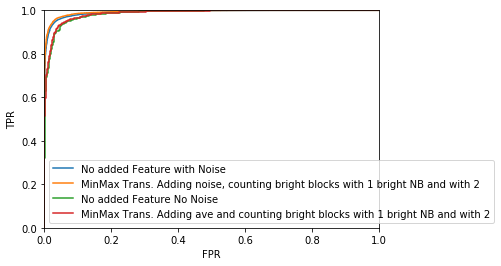

In [19]:
# Alpha=100
fpr2te, tpr2te, thr2te = sklearn.metrics.roc_curve(y_va, y_hat_Origin)
plt.plot(fpr2te,tpr2te, label="No added Feature with Noise")

fpr3te, tpr3te, thr3te = sklearn.metrics.roc_curve(y_va, y_hat_New)
plt.plot(fpr3te,tpr3te, label="MinMax Trans. Adding noise, counting bright blocks with 1 bright NB and with 2")

fpr1Tte, tpr1Tte, thr1Tte = sklearn.metrics.roc_curve(y_va0, y_hat0)
plt.plot(fpr1Tte,tpr1Tte, label="No added Feature No Noise")

fprTte, tprTte, thrTte = sklearn.metrics.roc_curve(y_va0, y_hat1)
plt.plot(fprTte,tprTte, label="MinMax Trans. Adding ave and counting bright blocks with 1 bright NB and with 2")

plt.xlim([-0.0, 1.0]);
plt.ylim([-0.0, 1.0]);
plt.legend();
plt.xlabel("FPR");
plt.ylabel("TPR");

In [23]:
x_test_NF=genfromtxt('data_sneaker_vs_sandal/x_test.csv', delimiter=',')[1:]
yproba1_test_N = new_lr2.predict_proba(x_test_NF)[:, 1]
np.savetxt('yproba1_test.txt', yproba1_test_N)

TurnOn Loaded
TurnOnOnce Loaded
Ave Loaded


Err: 0.425 0.992655

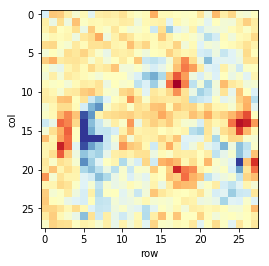

In [25]:
w1=new_lr2.w_G[0:784]
plt.imshow(w1.reshape(28,28), interpolation='nearest', vmin=-0.5, vmax=0.5, cmap='RdYlBu')
plt.xlabel('row');
plt.ylabel('col');
plt.show()

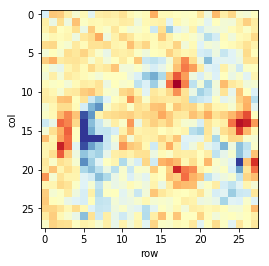

In [26]:
w1=new_lr2.w_G[784:2*784]
plt.imshow(w1.reshape(28,28), interpolation='nearest', vmin=-0.5, vmax=0.5, cmap='RdYlBu')
plt.xlabel('row');
plt.ylabel('col');
plt.show()

In [31]:
w1=new_lr2.w_G[2*784:-1]
print(w1)
print(w1.size)

[-1.0161138   2.05783374 -0.00750544]
3
